In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import lbg_forecast.tools as tools
import lbg_forecast.hyperparams as hyp
import numpy as np
import matplotlib.pyplot as plt
import fsps
import lbg_forecast.colour_cuts as cuts
import lbg_forecast.tools

In [3]:
bounds = hyp.define_hyperparameter_bounds(

    zred = np.array([0, 3.0, 6.6]),
    logtage = np.array([0, np.log10(0.070), np.log10(0.070)]),
    logzsol = np.array([0, np.log10(0.2), np.log10(0.2)]),
    dust1 = np.array([0, 0, 0]),
    dust2 = np.array([0, 0.599, 0.599]),
    igm_factor = np.array([0, 1, 1]), 
    gas_logu = np.array([0, -2, -2]),
    gas_logz = np.array([0, 0, 0]),
    fagn = np.array([0, 0, 0]),
    imf1 = np.array([0, 2.35, 2.35]), 
    imf2 = np.array([0, 2.35, 2.35]), 
    imf3 = np.array([0, 2.35, 2.35]), 
    logtau = np.array([0, -4, -4]),
    loga = np.array([0, 3, 3]),
    logb = np.array([0, -3, -3]),
    logmass = np.array([0, 12, 12])

    )

hyperparameters = hyp.sample_hyper_parameters(bounds)
photo, spsparams = tools.simulate_photometry(ngalaxies=2000, hyperparams=hyperparameters, dust_type=2, imf_type=0, filters='suprimecam')

SPS Parameters Generated


/Users/fpetri/repos/LBGforecast/lbg_forecast/sfh.py:8: RuntimeWarning: overflow encountered in power
  return ((t/tau)**(a) + (t/tau)**(-b))**(-1)


1000
2000
First Run Complete
1000
2000
Second Run Complete
1000
2000
Complete


In [4]:
colours = tools.calculate_colours(photo)
print(fsps.find_filter('suprimecam')[1:2]+fsps.find_filter('suprimecam')[3:])

['suprimecam_g', 'suprimecam_r', 'suprimecam_i', 'suprimecam_z']


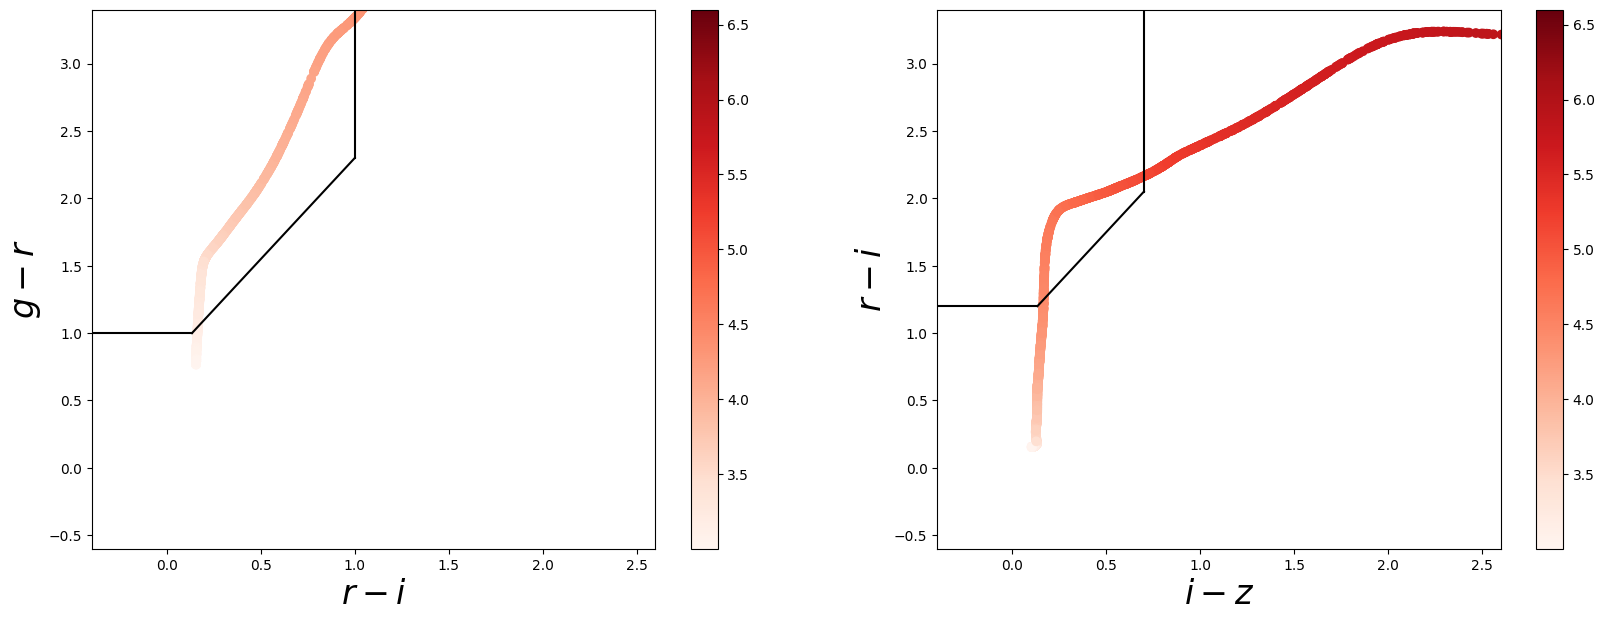

In [5]:
full_colour_map_u, ax = plt.subplots(1, 2, figsize=(20, 7))
ax1 = ax[0]
ax2 = ax[1]

#g colour cuts
x_range1 = np.linspace(-1,(1.0-0.8)/1.5,10)
x_range2 = np.linspace((1.0-0.8)/1.5, 1.0, 10)
y_range1 = np.linspace(2.3, max(colours[:,0]), 10)
y_range2 = np.linspace(1.0, max(colours[:,0]), 10)   

gplot = ax1.scatter(colours[:,1], colours[:,0], c=spsparams[:, 0], cmap="Reds")
ax1.set_xlabel("$r - i$", fontsize=24)
ax1.set_ylabel("$g - r$", fontsize=24)
ax1.set_xlim(-0.4, 2.6)
ax1.set_ylim(-0.6, 3.4)
plt.colorbar(gplot, ax=ax1)

ax1.plot(x_range1, cuts.g_cut1(x_range1), color = 'k')
ax1.plot(cuts.g_cut2(y_range1), y_range1, color = 'k')
ax1.plot(cuts.g_cut3(y_range2), y_range2, color = 'k')
ax1.plot(x_range2, cuts.g_cut4(x_range2), color = 'k')

#r colour cuts
x_range1 = np.linspace(-1,(1.2-1.0)/1.5,10)
x_range2 = np.linspace((1.2-1.0)/1.5, 0.7, 10)
y_range1 = np.linspace(2.05, max(colours[:,1]), 10)
y_range2 = np.linspace(1.2, max(colours[:,1]), 10)    

rplot = ax2.scatter(colours[:,2], colours[:,1], c=spsparams[:, 0], cmap="Reds")
ax2.set_xlabel("$i - z$", fontsize=24)
ax2.set_ylabel("$r - i$", fontsize=24)
ax2.set_xlim(-0.4, 2.6)
ax2.set_ylim(-0.6, 3.4)
plt.colorbar(rplot, ax=ax2)

ax2.plot(x_range1, cuts.r_cut1(x_range1), color = 'k')
ax2.plot(cuts.r_cut2(y_range1), y_range1, color = 'k')
ax2.plot(cuts.r_cut3(y_range2), y_range2, color = 'k')
ax2.plot(x_range2, cuts.r_cut4(x_range2), color = 'k')

Galaxy Age (Gyr): 0.07000000000000002
Observed Metallicity (Absolute Metallicity): 0.0028400000000000005


(array([4.49043428e-05, 4.49421741e-05, 4.49805190e-05, 4.50193846e-05,
        4.50587778e-05, 4.50987059e-05, 4.51391760e-05, 4.51801957e-05,
        4.52217723e-05, 4.52639134e-05, 4.53066266e-05, 4.53499197e-05,
        4.53938007e-05, 4.54382774e-05, 4.54833580e-05, 4.55290507e-05,
        4.55753637e-05, 4.56223055e-05, 4.56698847e-05, 4.57181098e-05,
        4.57669897e-05, 4.58165333e-05, 4.58667495e-05, 4.59176475e-05,
        4.59692366e-05, 4.60215261e-05, 4.60745255e-05, 4.61282445e-05,
        4.61826929e-05, 4.62378805e-05, 4.62938174e-05, 4.63505137e-05,
        4.64079799e-05, 4.64662262e-05, 4.65252634e-05, 4.65851022e-05,
        4.66457533e-05, 4.67072280e-05, 4.67695373e-05, 4.68326925e-05,
        4.68967053e-05, 4.69615871e-05, 4.70273499e-05, 4.70940055e-05,
        4.71615661e-05, 4.72300440e-05, 4.72994516e-05, 4.73698016e-05,
        4.74411067e-05, 4.75133800e-05, 4.75866345e-05, 4.76608836e-05,
        4.77361408e-05, 4.78124198e-05, 4.78897344e-05, 4.796809

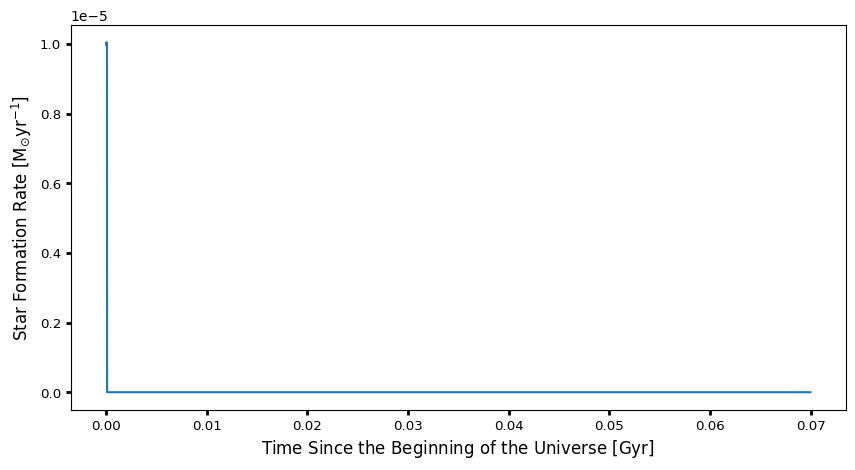

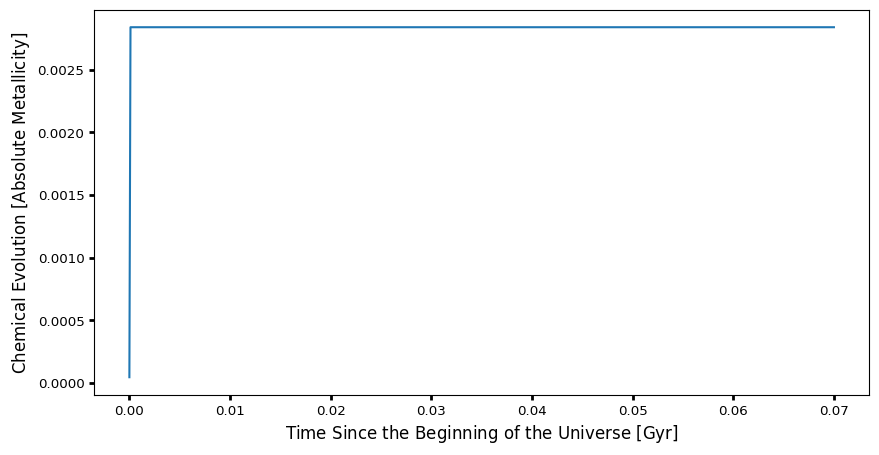

In [6]:
tools.sfh_zhis_diag(spsparams, 0)